# Data Description

**OBJECTIVE**

This project explores the 2021 World Happiness Report dataset with a step-by-step exploratory data analysis (EDA) to understand how social, economic, and health factors relate to the overall Happiness Score across countries.

---

- **Source**: [Kaggle - World Happiness Report 2021](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021)
- **Rows**: 149 countries
- **Columns**: 20 metrics including happiness score, economic indicators, health, freedom, social support, generosity, and corruption.

---

* Data Dictionary

| Column Name | Description |
|-------------|-------------|
| Country name | Country being evaluated |
| Regional indicator | Geographical region of the country |
| Ladder score | Happiness score (target) — based on citizen life evaluations |
| Standard error of ladder score | Standard error associated with ladder score |
| upperwhisker | Upper bound used for visualization (boxplot) |
| lowerwhisker | Lower bound used for visualization (boxplot) |
| Logged GDP per capita | Log-transformed GDP per capita |
| Social support | Perceived social support |
| Healthy life expectancy | Expected years of healthy living |
| Freedom to make life choices | Citizen's freedom to make life decisions |
| Generosity | Tendency to donate/help others |
| Perceptions of corruption | Perceived corruption in government and business |
| Ladder score in Dystopia | Hypothetical worst-case baseline score |
| Explained by: Log GDP per capita | Contribution of GDP to happiness score |
| Explained by: Social support | Contribution of social support |
| Explained by: Healthy life expectancy | Contribution of life expectancy |
| Explained by: Freedom to make life choices | Contribution of freedom |
| Explained by: Generosity | Contribution of generosity |
| Explained by: Perceptions of corruption | Contribution of perceived corruption |
| Dystopia + residual | Remaining score not explained by other factors |

# Importing Libraries

In [15]:
!pip install opendatasets

In [30]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt

# Exploring the Data

In [17]:
od.download('https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021')

Skipping, found downloaded files in "./world-happiness-report-2021" (use force=True to force download)


In [18]:
df = pd.read_csv('/content/world-happiness-report-2021/world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [20]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


# Data Cleaning & Preprocessing

## Missing Values

In [23]:
df.isna().sum()

,0
Country,0
Region,0
Happiness,0
Standard error of ladder score,0
upperwhisker,0
lowerwhisker,0
GDP,0
Social support,0
Life_Expectancy,0
Freedom,0


## Duplicate Values

In [24]:
df.duplicated().sum()

np.int64(0)

## Drop Columns

In [25]:
drop_cols = [
    'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
    'Ladder score in Dystopia', 'Explained by: Log GDP per capita',
    'Explained by: Social support', 'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
    'Explained by: Perceptions of corruption', 'Dystopia + residual'
]

df.drop(columns=drop_cols, inplace=True)

## Rename Columns

In [25]:
df.rename(columns={
    "Country name": "Country",
    "Regional indicator": "Region",
    "Ladder score": "Happiness",
    "Logged GDP per capita": "GDP",
    "Healthy life expectancy": "Life_Expectancy",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption"
}, inplace=True)

# Univariate Analysis

In [27]:
df.describe()

,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [28]:
df.describe(include = 'O')

,Country,Region
count,149,149
unique,149,10
top,Finland,Sub-Saharan Africa
freq,1,36


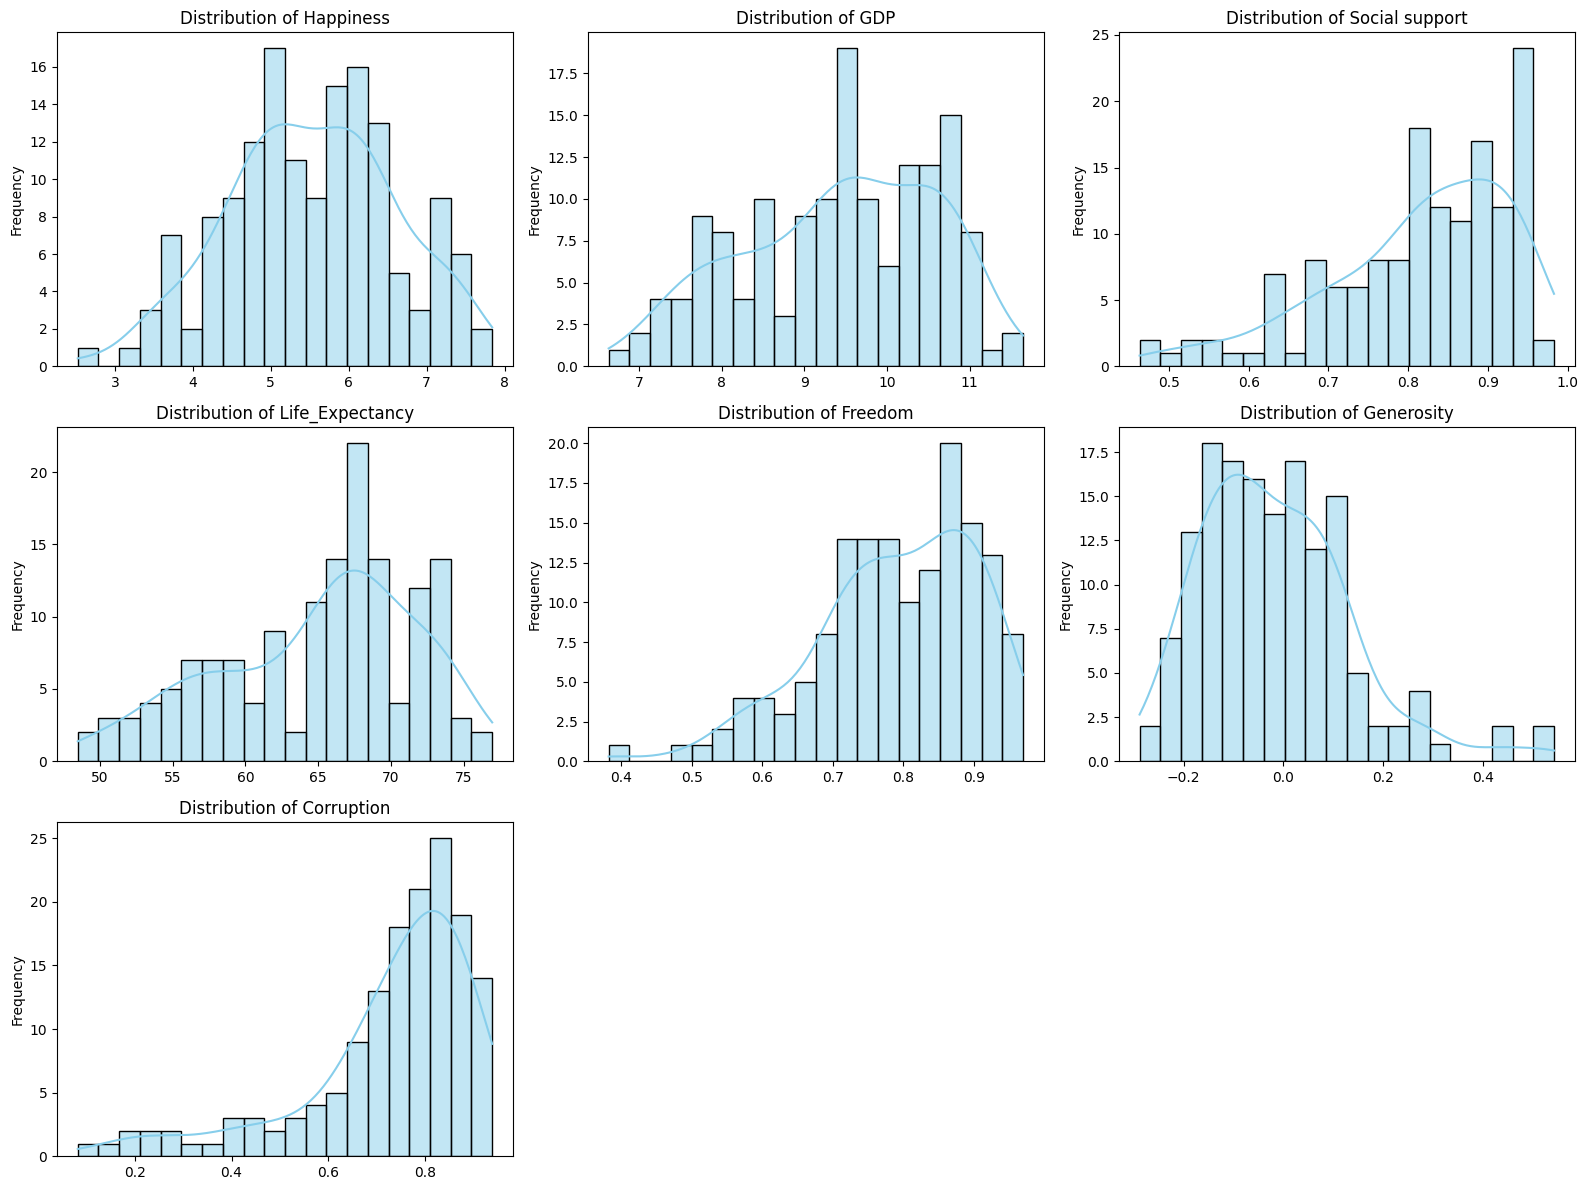

In [31]:
numeric_cols = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy',
                'Freedom', 'Generosity', 'Corruption']

num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color='skyblue', bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

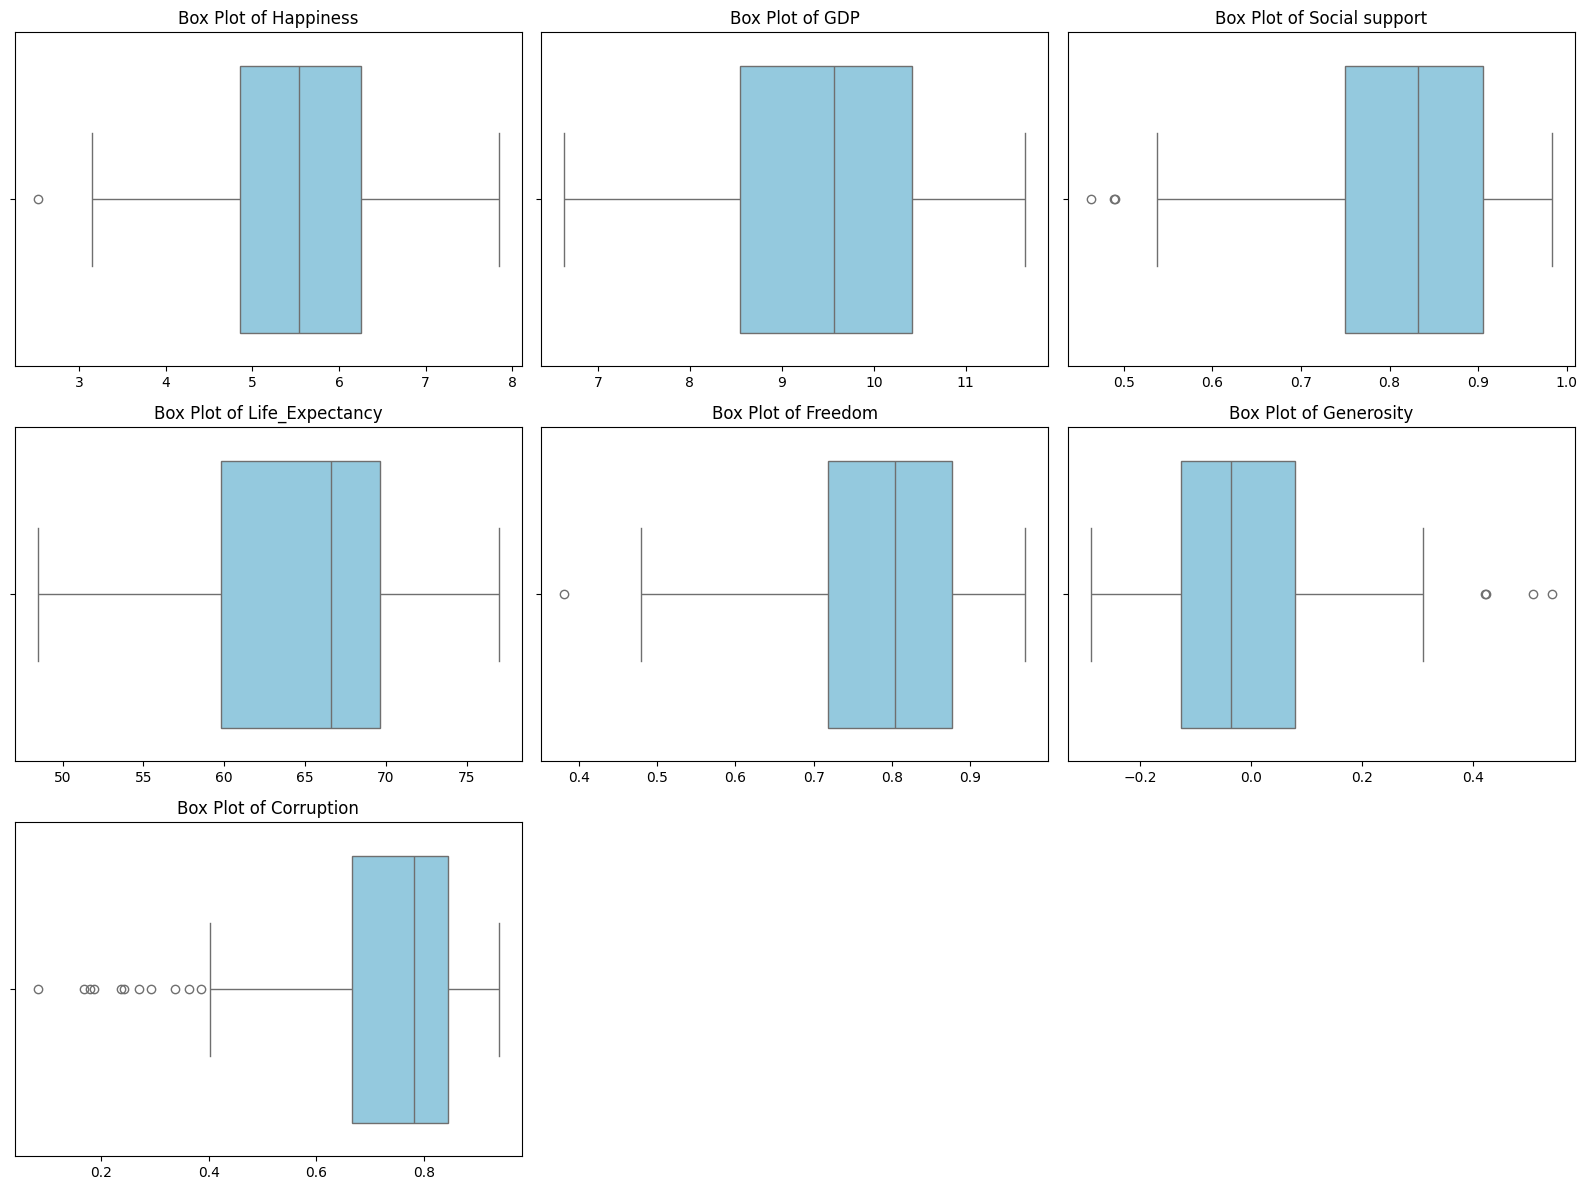

In [32]:
num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Key Observations

* Features like GDP, Generosity, and Corruption show significant skewness and variance
* The target variable Happiness is fairly normally distributed.

/tmp/ipython-input-2788601644.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')


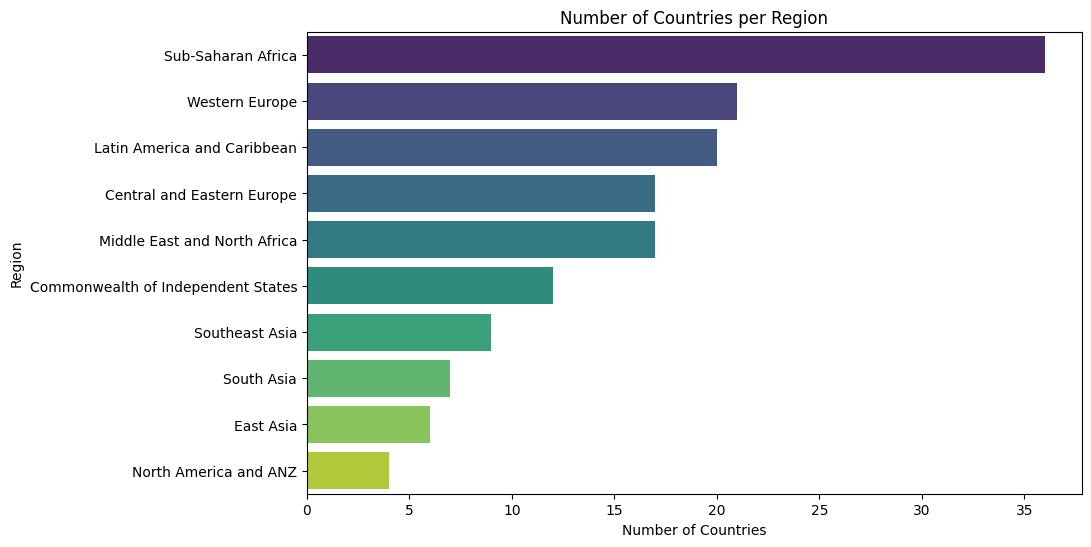

In [33]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='viridis')
plt.title("Number of Countries per Region")
plt.xlabel("Number of Countries")
plt.ylabel("Region")
plt.show()

The most represented regions are:

* Sub-Saharan Africa
* Western Europe
* Central and Eastern Europe

# Bivariate & Correlation Analysis

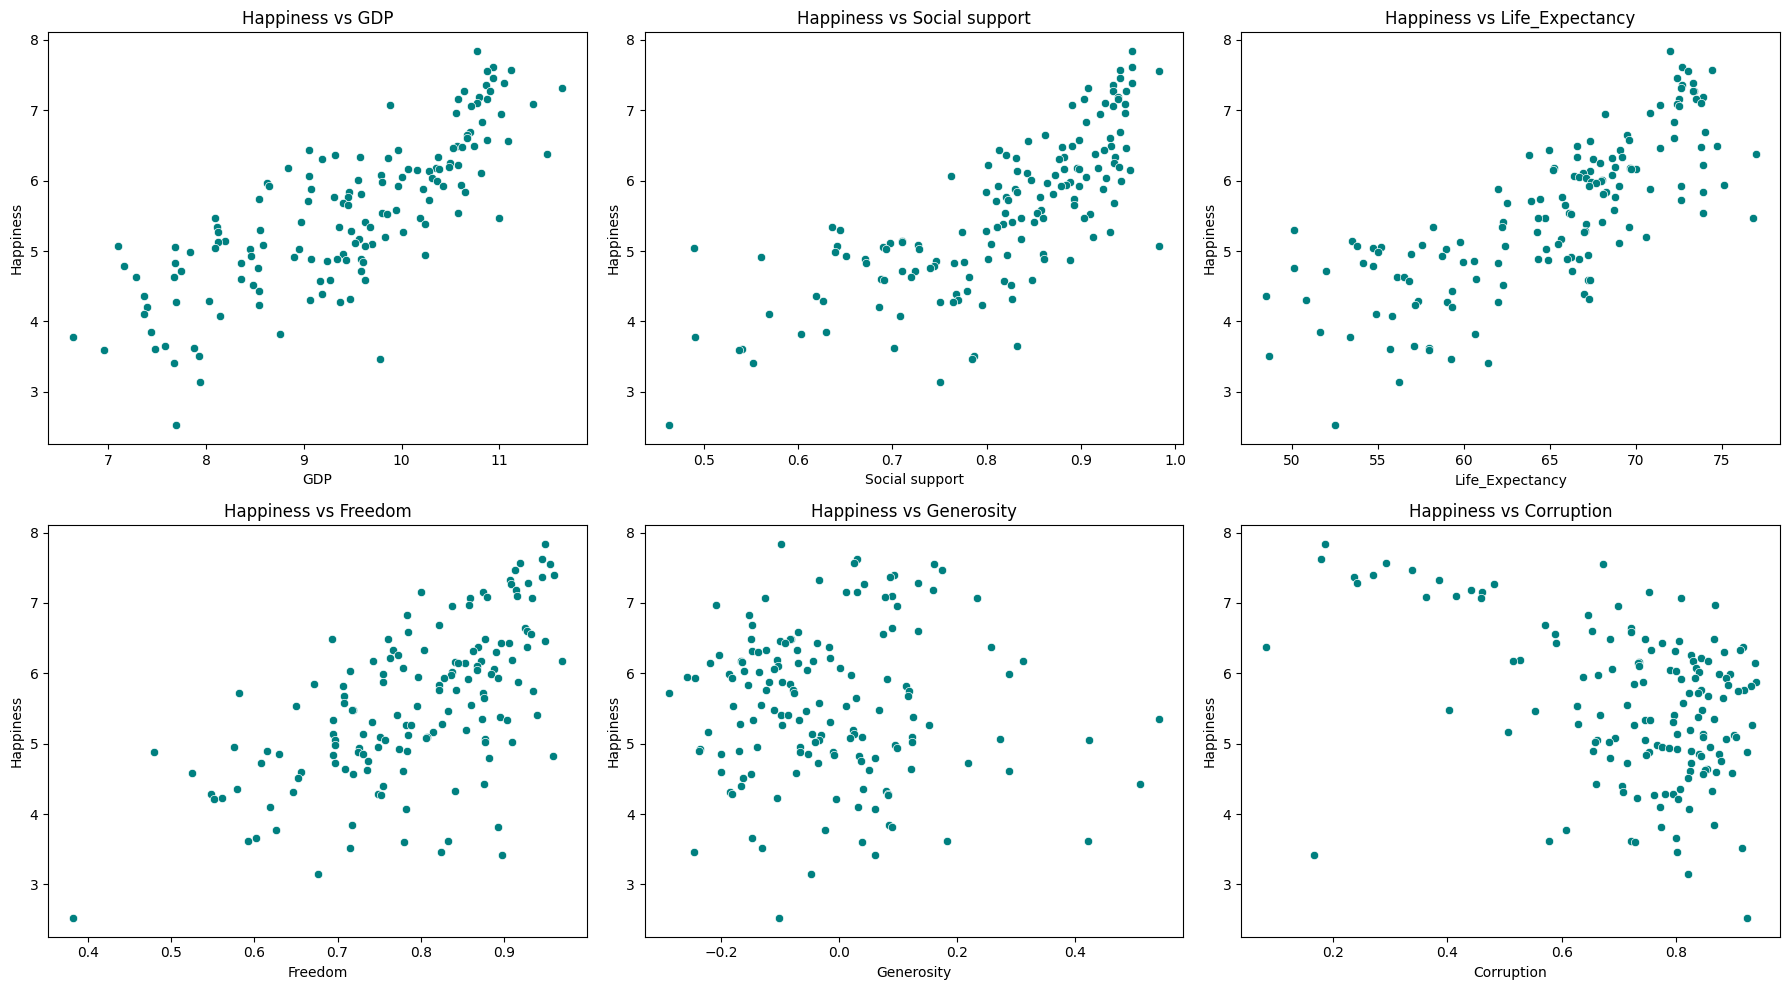

In [35]:
features = ['GDP', 'Social support', 'Life_Expectancy',
            'Freedom', 'Generosity', 'Corruption']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['Happiness'], ax=axes[i], color='teal')
    axes[i].set_title(f'Happiness vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Happiness')

plt.tight_layout()
plt.show()

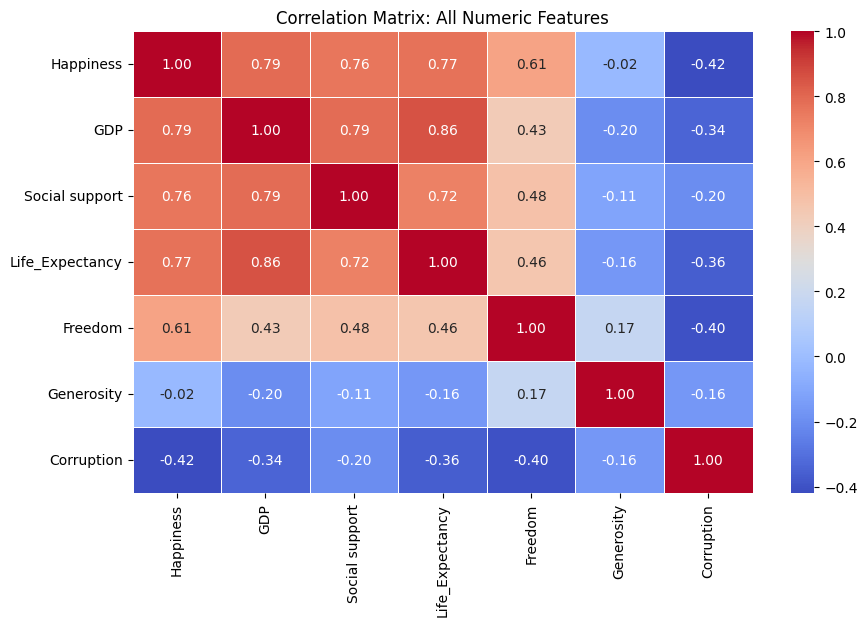

In [36]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: All Numeric Features")
plt.show()

/tmp/ipython-input-3330567009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=happiness_corr.values, y=happiness_corr.index, palette='crest')


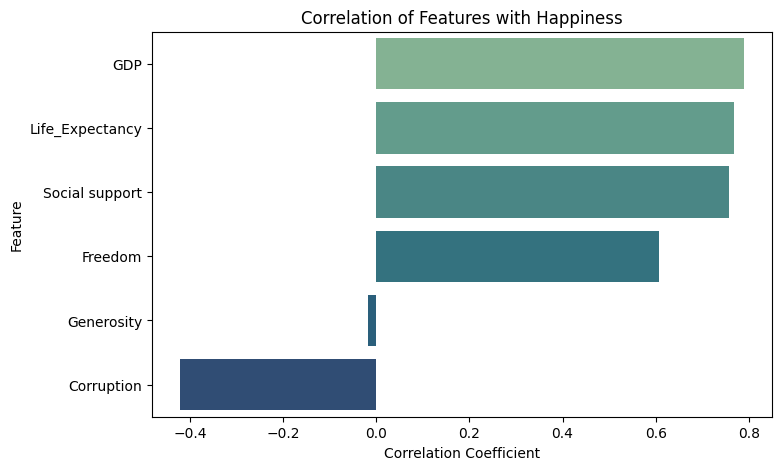

In [37]:
happiness_corr = corr_matrix['Happiness'].drop('Happiness').sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=happiness_corr.values, y=happiness_corr.index, palette='crest')
plt.title("Correlation of Features with Happiness")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

Correlation Insights
* GDP, Social Support, and Life Expectancy show the strongest positive correlation with Happiness.
* Freedom is moderately positively correlated.
* Generosity and Corruption perception have weak or inconsistent correlations, indicating cultural/perceptual influence.
* Some scatter plots (e.g., Happiness vs GDP) suggest near-linear patterns; others (e.g., Generosity) are more diffuse.

# Regional & Country-Level Comparisons¶


/tmp/ipython-input-4226822048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')


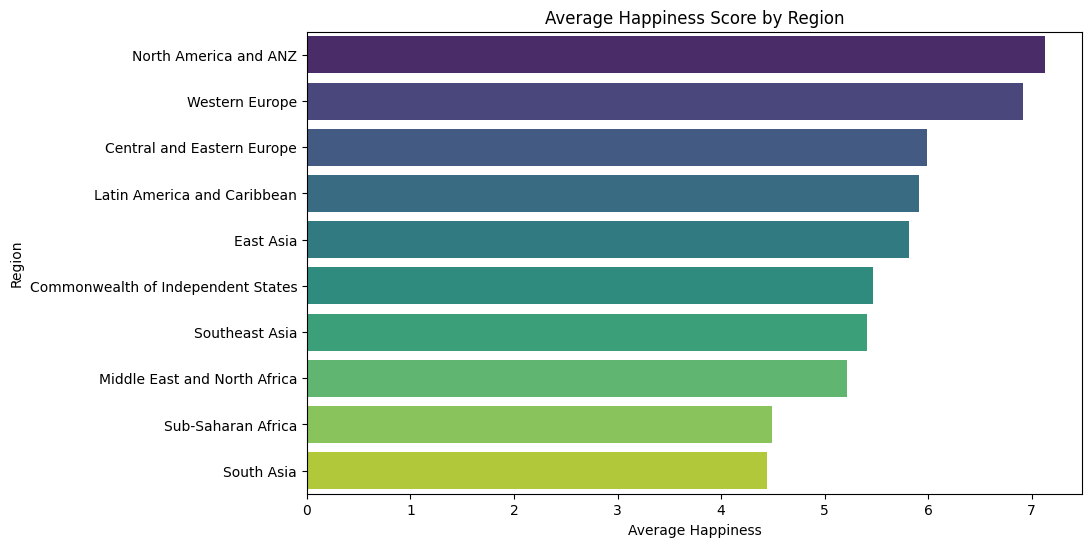

In [38]:
region_avg = df.groupby('Region')['Happiness'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')
plt.title("Average Happiness Score by Region")
plt.xlabel("Average Happiness")
plt.ylabel("Region")
plt.show()

/tmp/ipython-input-2943815009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Happiness', palette='coolwarm')


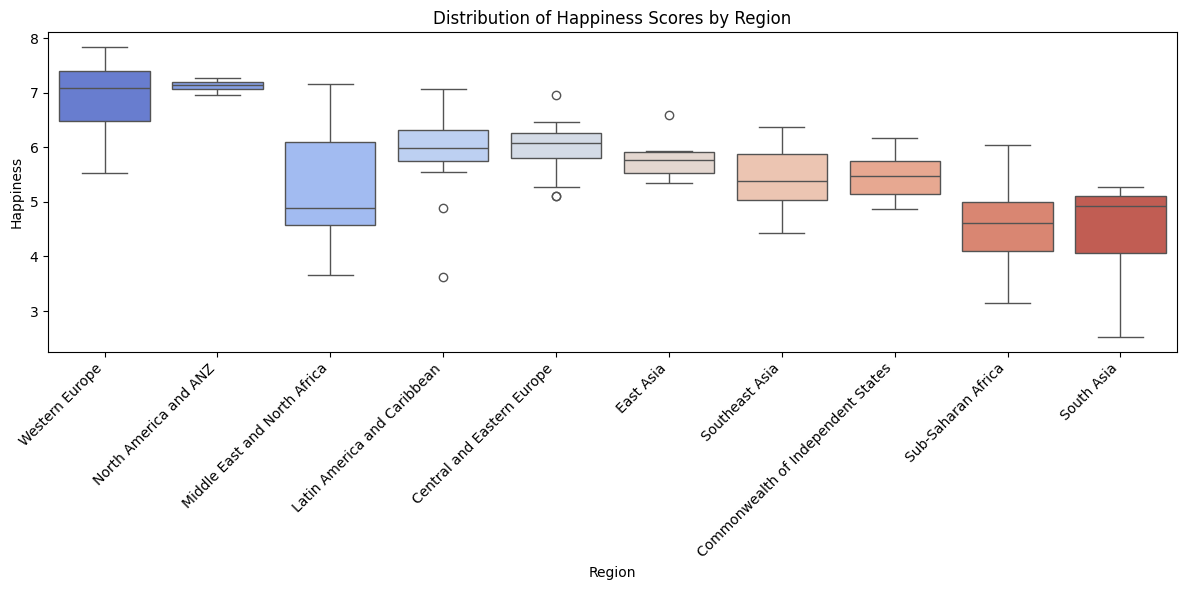

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Happiness', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Happiness Scores by Region")
plt.ylabel("Happiness")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2774350731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


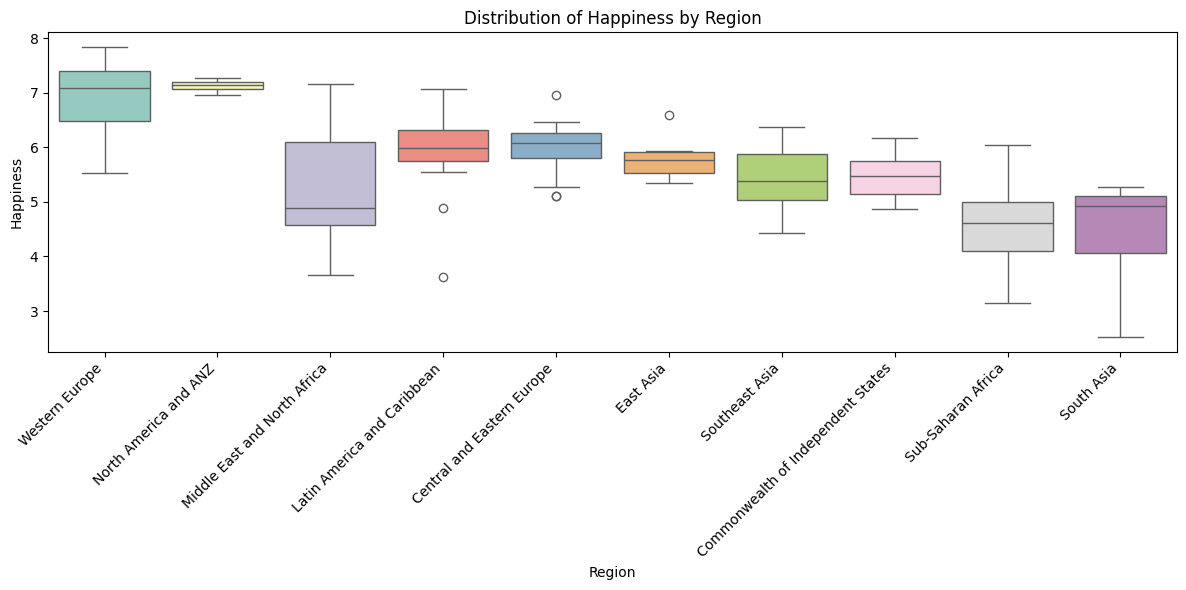

/tmp/ipython-input-2774350731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


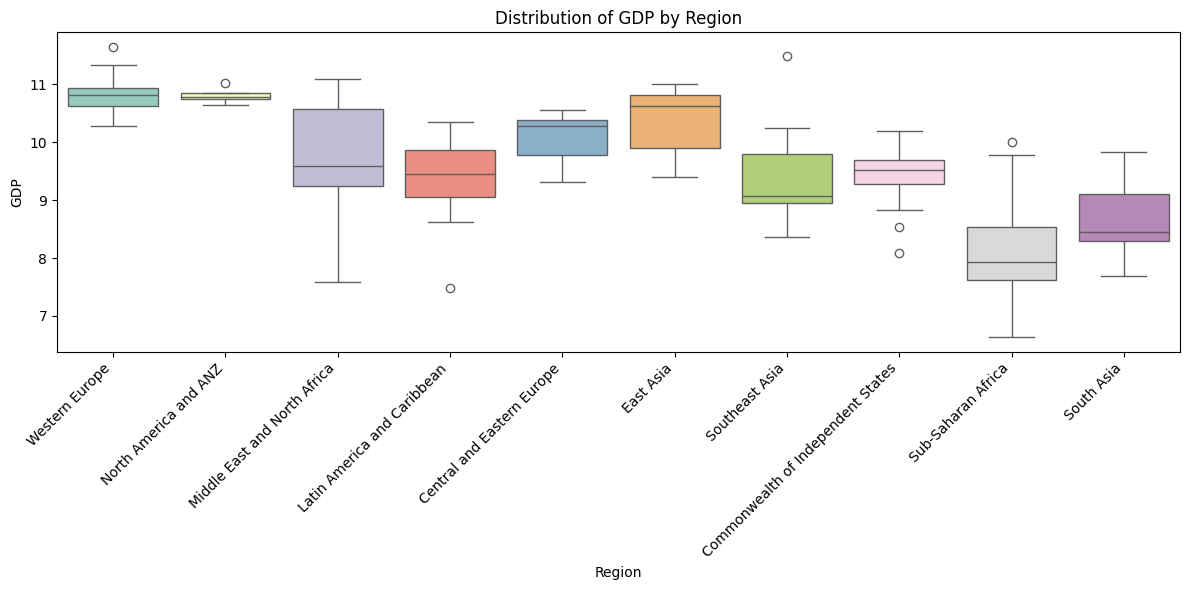

/tmp/ipython-input-2774350731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


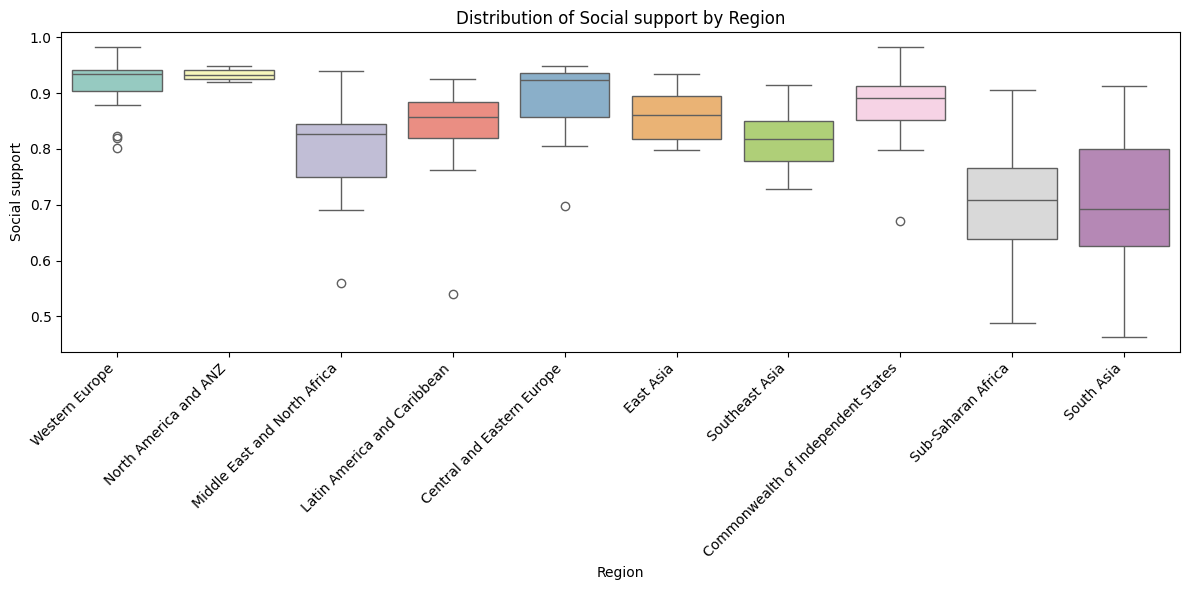

/tmp/ipython-input-2774350731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


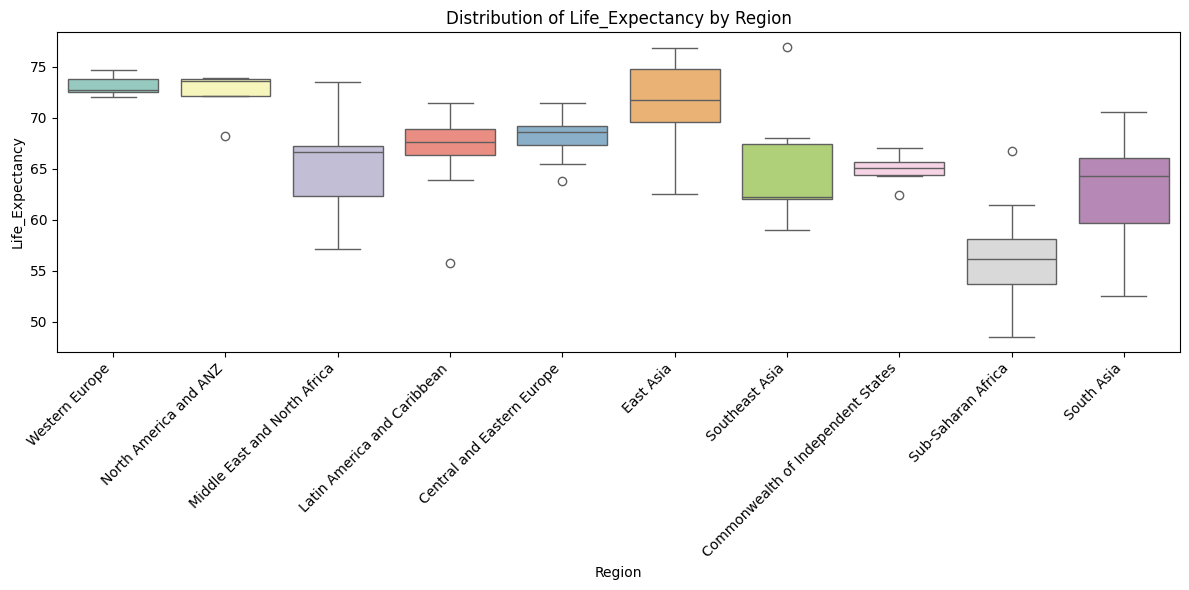

/tmp/ipython-input-2774350731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


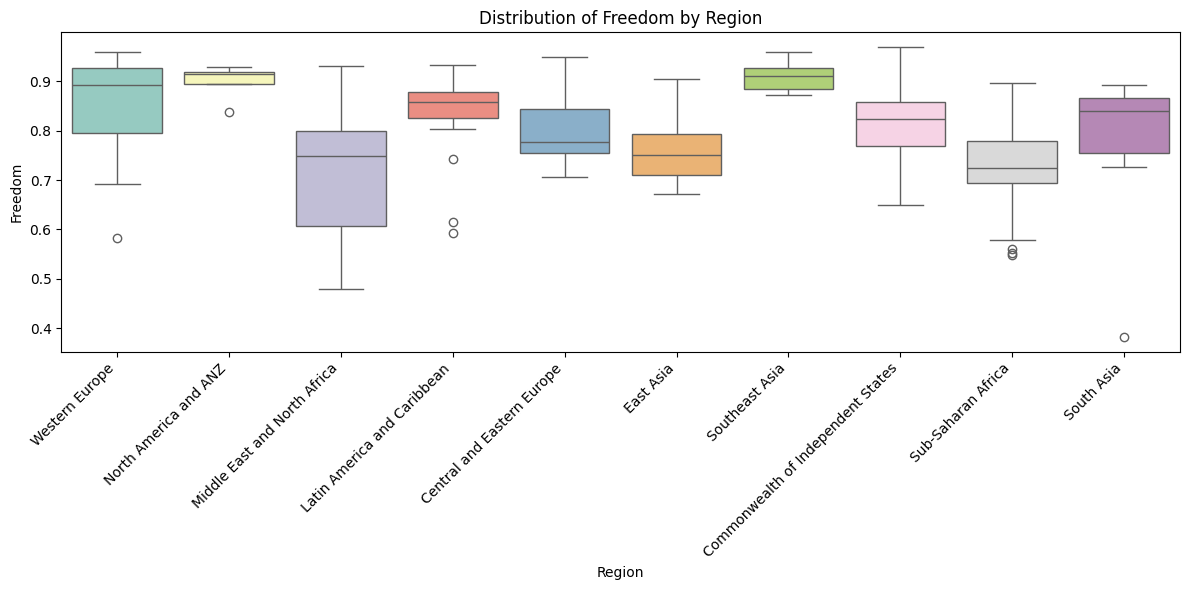

/tmp/ipython-input-2774350731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


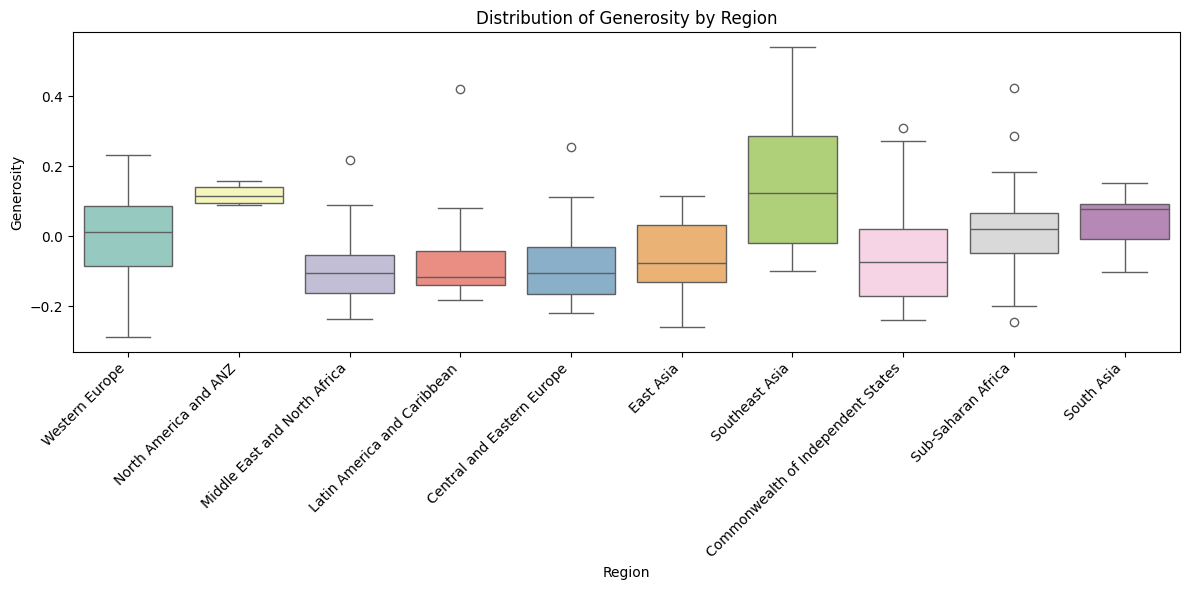

/tmp/ipython-input-2774350731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


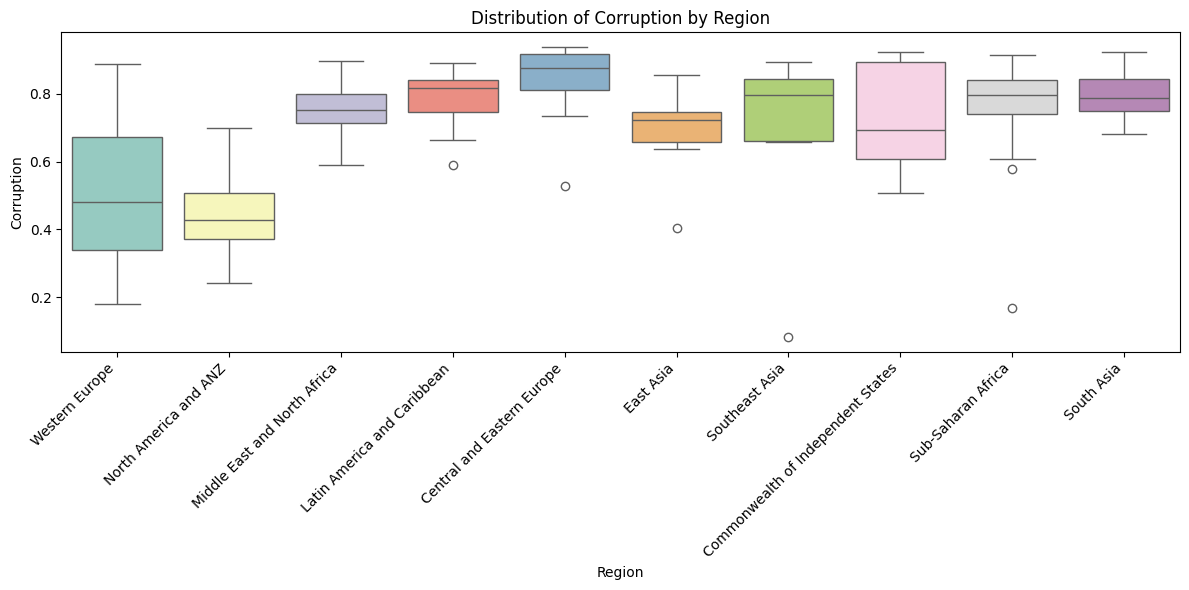

In [40]:
features_to_plot = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy',
                    'Freedom', 'Generosity', 'Corruption']

for col in features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Region', y=col, palette='Set3')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Distribution of {col} by Region")
    plt.xlabel("Region")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Regional Distributions Summary

Each boxplot shows how a specific variable is distributed across regions:

* Western Europe and North America & ANZ typically show higher medians for GDP, Life Expectancy, and Happiness.
* Sub-Saharan Africa tends to have the lowest medians and wider spreads in most indicators.
* Outliers in regions like Middle East and North Africa or South Asia reflect country-level exceptions (e.g., Gulf countries with high GDP but low freedom).
* Social support is more evenly distributed than most features.

> These visuals highlight how economic and social factors differ not only between countries but between entire regions.




/tmp/ipython-input-882323727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
/tmp/ipython-input-882323727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
/tmp/ipython-input-882323727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
/tmp/ipython-input-882323727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

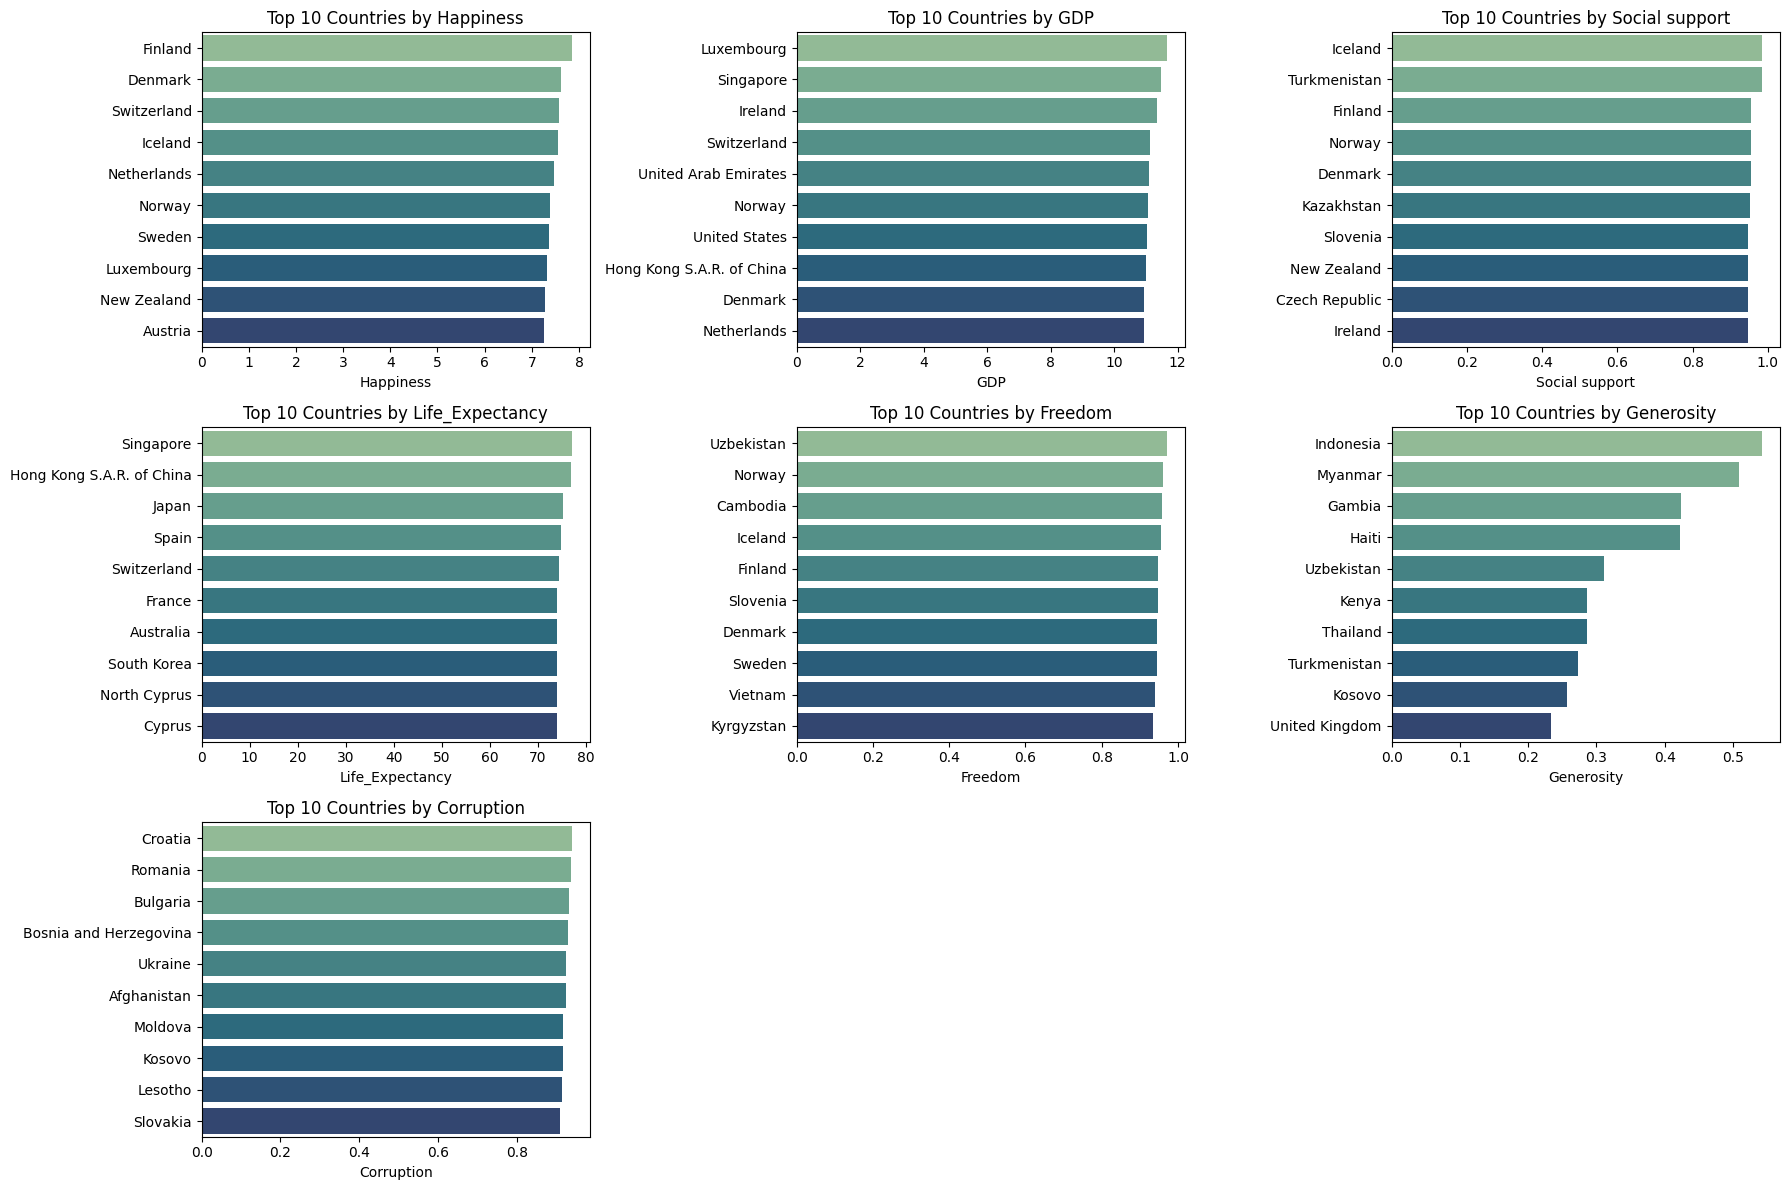

In [41]:
features = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy',
                    'Freedom', 'Generosity', 'Corruption']

n_cols = 3
n_rows = math.ceil(len(features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    top10 = df[['Country', col]].sort_values(by=col, ascending=False).head(10)
    sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
    axes[i].set_title(f"Top 10 Countries by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3813235282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
/tmp/ipython-input-3813235282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
/tmp/ipython-input-3813235282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
/tmp/ipython-input-3813235282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

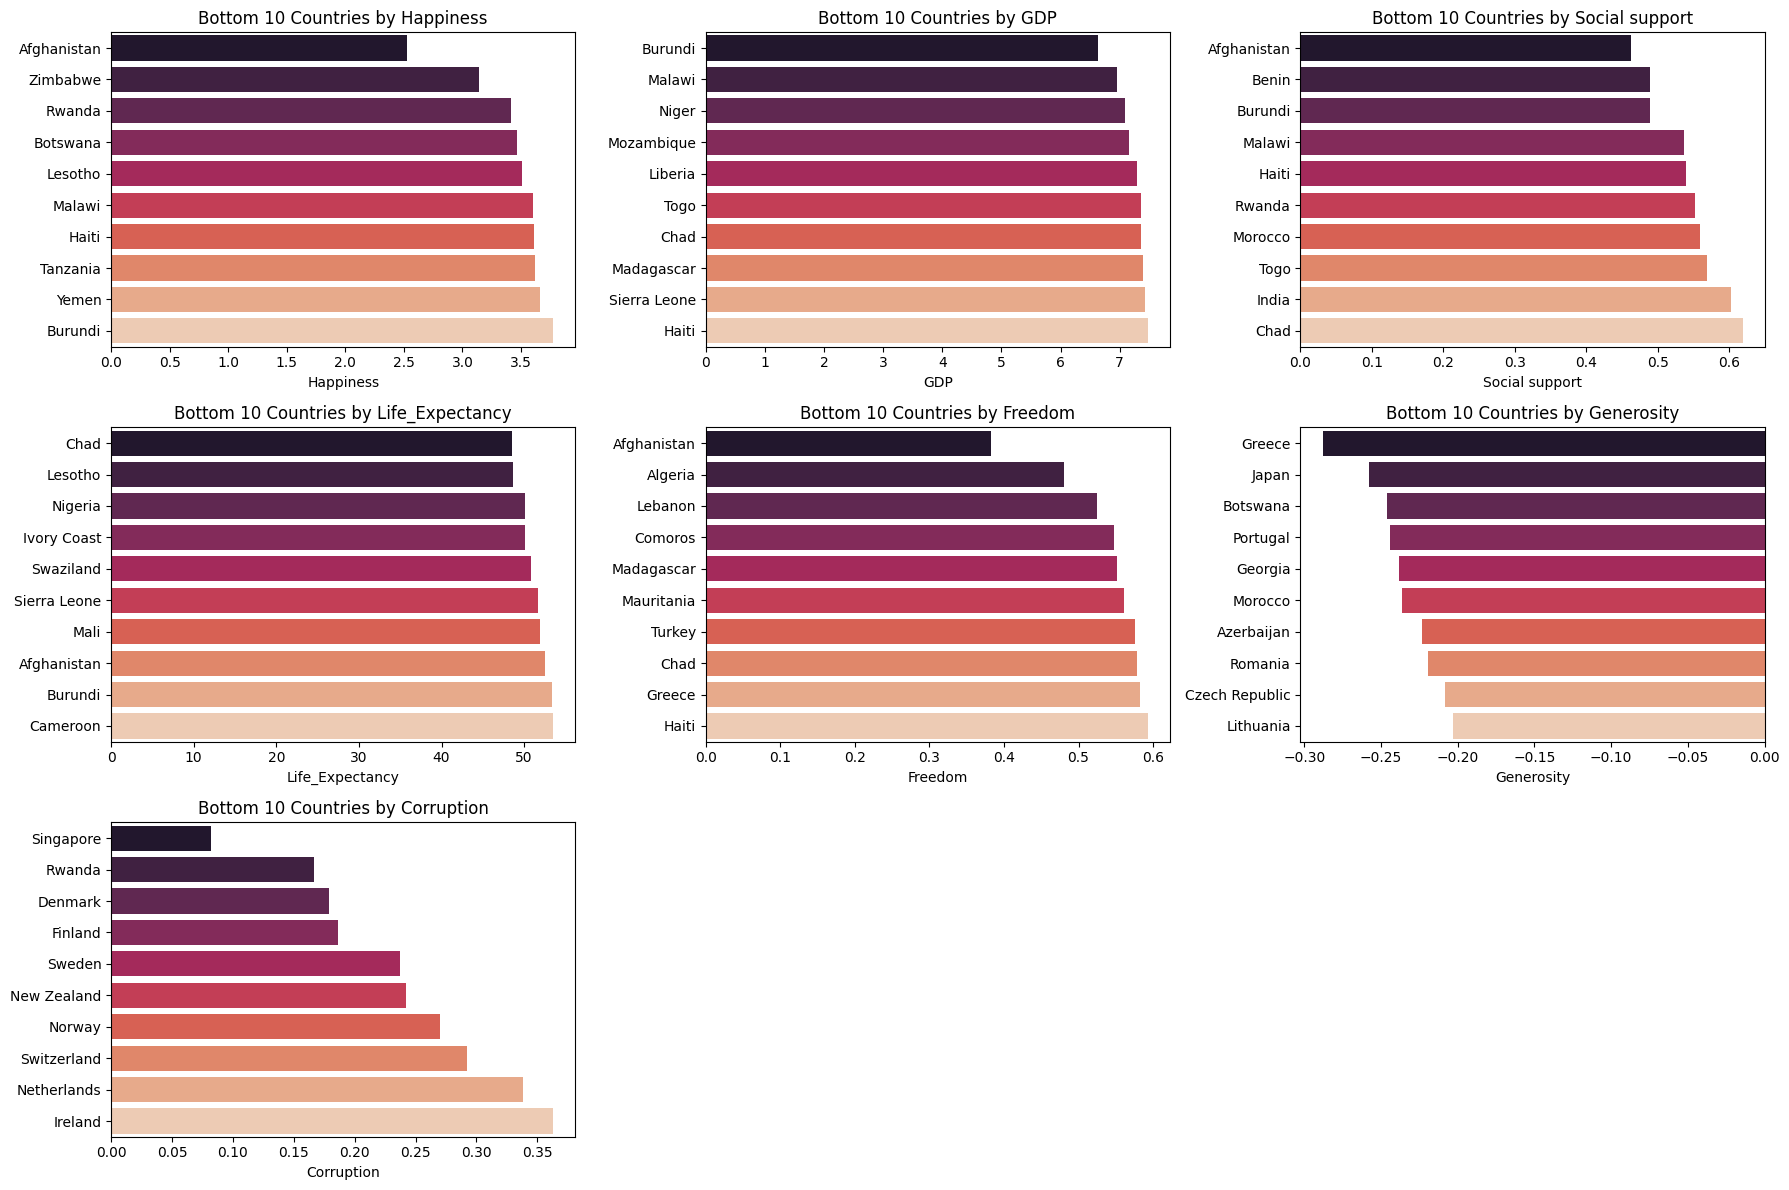

In [42]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    bottom10 = df[['Country', col]].sort_values(by=col, ascending=True).head(10)
    sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
    axes[i].set_title(f"Bottom 10 Countries by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Conclusions & Insights

Key Findings:

1. **Top Influencers of Happiness**:
   - `GDP`, `Social support`, and `Life_Expectancy` show the **strongest positive correlations** with Happiness.
   - `Freedom` also contributes positively but with slightly less impact.
   - `Generosity` and `Corruption` show **weaker and more variable** relationships — possibly due to cultural or perceptual differences.

2. **Regional Trends**:
   - **Western Europe** and **North America & ANZ** consistently rank highest in most features, especially `Happiness`, `GDP`, and `Freedom`.
   - **Sub-Saharan Africa** and parts of **South Asia** score lowest in both `Happiness` and `Life Expectancy`.

3. **Top & Bottom Countries**:
   - Countries like **Finland, Denmark, Switzerland** appear frequently in the top 10 across many features.
   - Countries with low scores tend to rank low in multiple features — not just one — emphasizing the interconnected nature of well-being.

---

Overall Conclusion:

> The World Happiness Report data clearly shows that economic prosperity, strong social networks, and health are key contributors to happiness worldwide.  
> While ethical factors like generosity and perceived corruption matter, their impact appears **less direct** and more culturally nuanced.

---

Further Steps :
- Create an **interactive dashboard** (e.g., using Plotly or Streamlit)
- Compare with past years to analyze **trends over time**
- Build a **Regression or ML model** to predict Happiness based on features


